PROJECT 
Cryptocurrency Liquidity
Prediction for Market Stability

PROBLEM STATEMENT


Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.


In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels
based on various market factors such as trading volume, transaction patterns, exchange listings, and social
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms
manage risks effectively.


Your final model should provide insights into market stability by forecasting liquidity variations, allowing
traders and financial institutions to make informed decisions.



Project Development StepS
1 Data Collection: Gather historical cryptocurrency price, volume, and liquidity-related data-

2 Data Preprocessing: Handle missing values, clean data, and normalize numerical featuresL

3 Exploratory Data Analysis (EDA): Analyze data patterns, trends, and correlations-

4 Feature Engineering: Create relevant liquidity-related features such as moving averages, volatility, and
liquidity ratios-

5 Model Selection: Choose appropriate machine learning models such as time-series forecasting, regression,or deep learning approaches-

6 Model Training: Train the selected model using the processed dataset-

7 Model Evaluation: Assess model performance using metrics such as RMSE, MAE, and R² score.

8 Hyperparameter Tuning: Optimize model parameters for better accuracy

9 Model Testing & Validation: Test the model on unseen data and analyze predictions

10 Local Deployment: Deploy the trained model locally using Flask or Streamlit for testing.

In [19]:
# STEP 1  DATA COLLECTION
import pandas as pd

# importing the data
df = pd.read_csv('crypto_data.csv')  # e.g., historical data
print(df.head())


       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


In [20]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [21]:
#STEP 2 DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler

# Handle missing values
df = df.dropna()  # or df.fillna(method='ffill')

# Convert timestamp if needed
df['date'] = pd.to_datetime(df['date'])

# Normalize numerical features
features = ['price', '24h_volume', 'mkt_cap']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


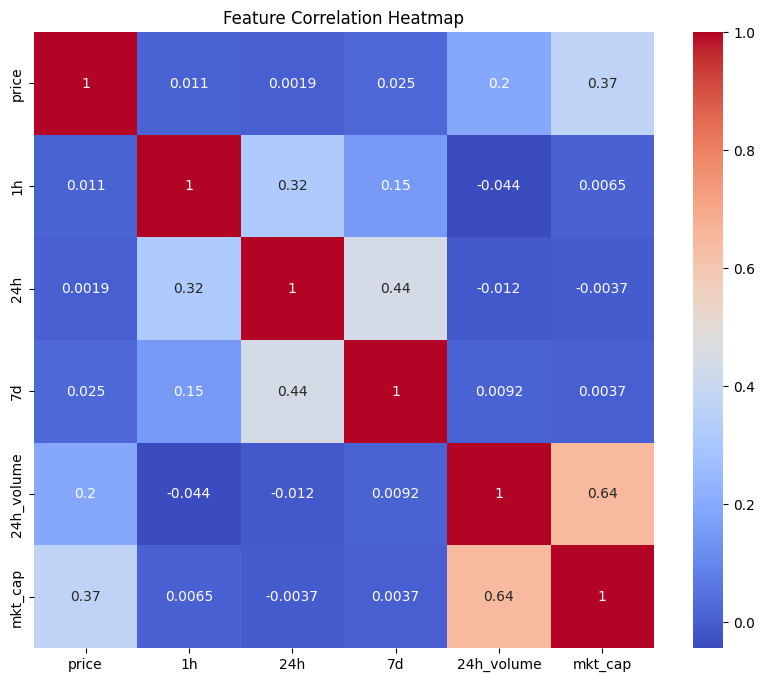

In [22]:
# STEP 3 EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Now safely compute correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [23]:
# STEP 4 FEATURE ENGINEERING
# Moving average
df['volume_ma_7'] = df['24h_volume'].rolling(window=7).mean()

# Volatility (rolling std deviation)
df['price_volatility'] = df['price'].rolling(window=7).std()

# Liquidity ratio (example)
df['liquidity_ratio'] = df['24h_volume'] / (df['price'] + 1e-6)


In [24]:
# STEP 5 MODEL SELCTION
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['volume_ma_7', 'price_volatility', 'liquidity_ratio']]
y = df['liquidity_ratio']  # or actual label if provided

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [25]:
#STEP 6 MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


RMSE: 0.003952941243602812
MAE: 0.0014481047763240029
R²: 0.9996756554830729


In [26]:
# STEP 7 HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [27]:
import joblib

# Save model
joblib.dump(model, 'liquidity_model.pkl')


['liquidity_model.pkl']